In [1]:
# !pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
import re

In [2]:
import requests

In [3]:
# !pip install nltk
import nltk

In [4]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [64]:
#download stopwords english
# nltk.download('stopwords')

In [65]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
# sw = list()

In [72]:
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub(' ', text)

In [73]:
def clean_html_entities(string):
    """
    removes html entities which are sometimes copied when trying to copy from the template
    """
    string = re.sub(r"&ldquo;|&rdquo;|&lsquo;|&rsquo;|&mdash;|&ndash;|&plusmn;|&deg;|&laquo;|&raquo;|&quot;", "", string)
    string = re.sub(r"&ne;|&le;|&ge;|&lt;|&gt;|&asymp;|&prime;|&Prime;|&bull;", "", string)
    string = re.sub(r"&zwj;|&zwnj;|&lrm;|&rlm;|&bdquo;|&hellip;|&permil;|&lsaquo;|&rsaquo;|&oline;|&frasl;|&ensp;|&emsp;|&thinsp;", "", string)
    string = re.sub(r"&amp;|&nbsp;|&:cent;|&brvbar;|&brkbar;|&sect;|&uml;|&copy;|&laqu;|&not;|&reg;|&hibar;|&sup1;|&sup2;|&sup3;|", "", string)
    return string

In [84]:
def clean_text_prelim(string):
    """
    clean text function used to clean article content and comment text
    """
    # replacing break signifiers with full stop so as to split into sentences properly
    string = re.sub(r"\n", " . ", string)
    string = re.sub(r"<br[ /]*>", " . ", string)
    
    string = remove_tags(string)
    string = clean_html_entities(string)
    # string = re.sub(r"\n", " ", string)
    string = re.sub(r"\t", " ", string)
    # string = re.sub(r"[\'\`\"]", "", string)
    
    # below line is different for comments     
    #string = re.sub(r"[()!?\'\`\"\”\“\‘\’\′\″\\\/*$«»°@#≈≠≤≥<>]", "", string)
    string = re.sub(r"\s{2,}", " ", string)
    # removing zero-width joiner unicode     
    string = re.sub("\u200d", "", string)
    string = re.sub("\u200c", "", string)
    
    return string.strip()

In [85]:
def clean_str_1544432917(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`*$@#]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
   # string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
   # string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
   # string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [97]:
def clean_str_new_combined(string):
    """
    combined clean_str - first prelim removal, then, standard clean_str for comments
    """
    string = clean_text_prelim(string)
    string = clean_str_1544432917(string)
    return string

In [86]:
def get_final_cleaned_article(msid):
    """
    combines subject and body of the article and cleans it 
    """
    entity_detail_ = get_entity_detail(msid)
    if(entity_detail_):
        subject = (entity_detail_['subject'] if ('subject' in entity_detail_) else "")
        story  = (entity_detail_['story'] if ('story' in entity_detail_) else "")
        return clean_text_article(subject + story)
    return ""

In [87]:
# get_final_cleaned_article(71978589)

In [88]:
# Generate a word cloud image
# wordcloud = WordCloud(background_color="black",max_words=2000).generate(text)

def generate_wordcloud(text):
    wordcloud = WordCloud(background_color="black",max_words=2000, max_font_size=40, stopwords=sw).generate(text)
    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [89]:
# def string_contains_alphabet(string):
#     if re.search('[a-zA-Z]', string):
#         return True
#     else:
#         return False

In [90]:
import pandas as pd

In [91]:
# old_pos_file = "english_retraining/data/rt-polarity_1544432917.pos"
# old_neg_file = "english_retraining/data/rt-polarity_1544432917.neg"
old_pos_file = "english_retraining/data/rt-polarity_1April.pos"
old_neg_file = "english_retraining/data/rt-polarity_2April.neg"

In [92]:
def read_lines_from_file(file_loc):
    with open(file_loc, 'r', encoding='utf-8') as f:
        lines_file = f.readlines()
    return lines_file

In [93]:
# df1 = pd.read_csv(old_pos_file, names = ['C_T'], header=None, index_col = False)
# df2 = pd.read_csv(old_neg_file, names = ['C_T'], header=None, index_col = False)

In [94]:
pos_lines = read_lines_from_file(old_pos_file)
neg_lines = read_lines_from_file(old_neg_file)

In [95]:
pos_cleaned_list = [clean_str_1544432917(clean_text_prelim(x)) for x in pos_lines]
neg_cleaned_list = [clean_str_1544432917(clean_text_prelim(x)) for x in neg_lines]

In [96]:
for index, item in enumerate(pos_lines[20:50]):
    print(index, item, pos_cleaned_list[index+20], sep='\n')
    print()

0
taatttttaaaaaa performance

taatttttaaaaaa performance

1
lolz......ur responsible for terrorism and hatered in the world<br/>

lolz ur responsible for terrorism and hatered in the world

2
And the name of island is West Bengal..

and the name of island is west bengal

3
About sbb agg gzgzg subs Hhz that shy away from home basic operating systems are not the year to do with it will take......

about sbb agg gzgzg subs hhz that shy away from home basic operating systems are not the year to do with it will take

4
Beef kha kha ke Pakistaniwon ka dimag kaam nahin karta hey..

beef kha kha ke pakistaniwon ka dimag kaam nahin karta hey

5
"Ambanis,adanis build themself took 30-40 yrs.not last 4 yr.you burning hater."

ambanis , adanis build themself took 30 40 yrs not last 4 yr you burning hater

6
What about your Mullas who misguide your community by resorting to issuing useless fatwas which are not relevant in this 21st century?!! Your community should send them to Jannat for mental dis

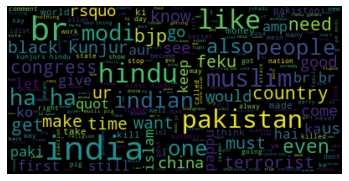

In [67]:
generate_wordcloud(" ".join(pos_cleaned_list))

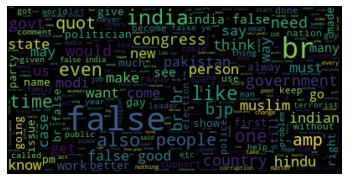

In [68]:
generate_wordcloud(" ".join(neg_cleaned_list))

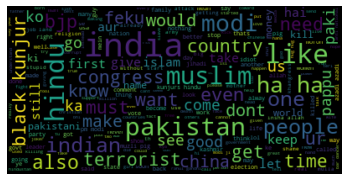

In [77]:
generate_wordcloud(" ".join(pos_cleaned_list))

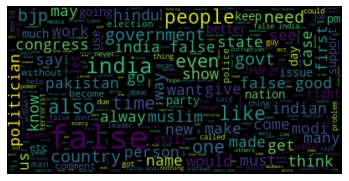

In [78]:
generate_wordcloud(" ".join(neg_cleaned_list))

In [ ]:
# cleaned_list = [clean_str_updated(x) for x in list_c]

In [ ]:
# generate_wordcloud(" ".join(cleaned_list))

In [ ]:
# generate_wordcloud("")

In [ ]:
# generate_wordcloud("BJP leading in 9 out of 10 seats in Haryana. leading Congress' Deepinder Singh Hooda leading from Rohtak leading constituency leading leading")